In [31]:
import rasterio as rs
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy

In [5]:
smap = rs.open('smap_first.tif')

In [10]:
smap_np = smap.read(1)

In [11]:
smap_np.shape

(1920, 2560)

In [12]:
import matplotlib.pyplot as plt

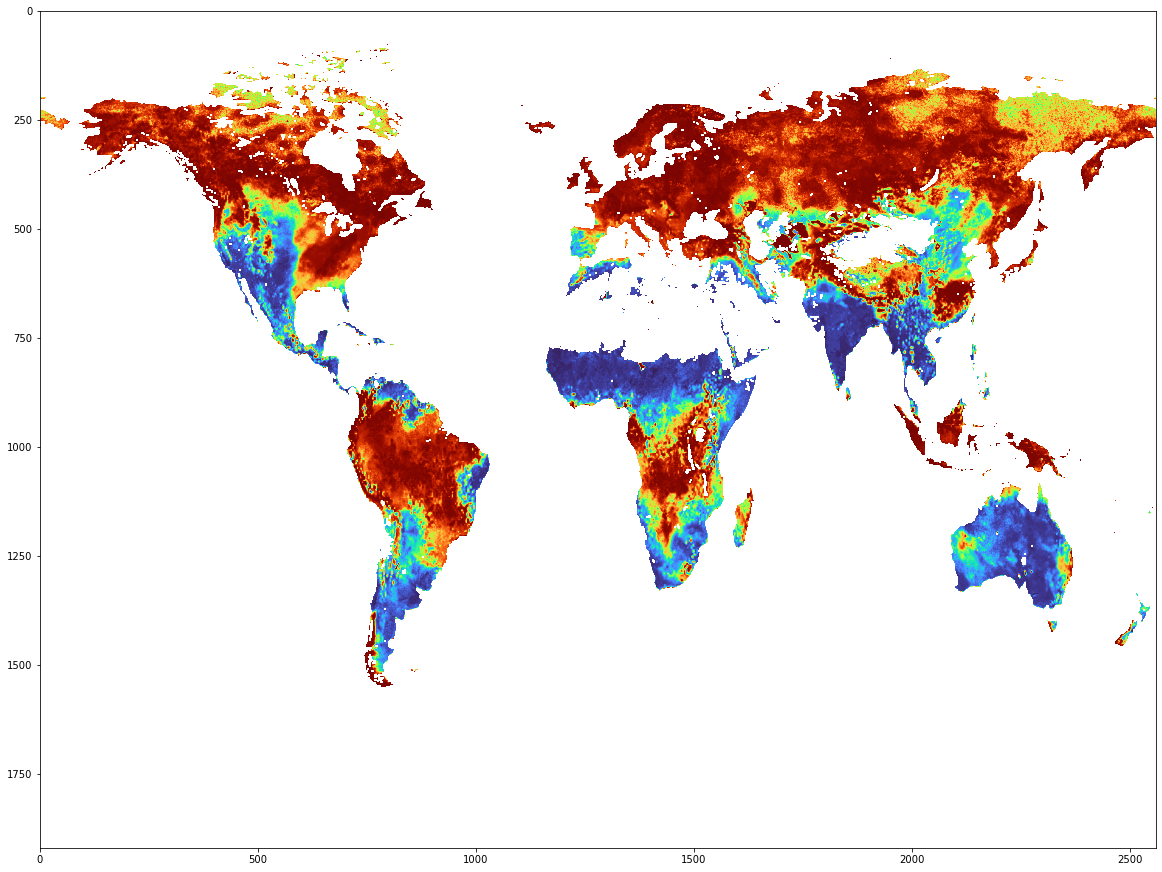

In [17]:
plt.figure(figsize=(20,20))
plt.imshow(smap_np,cmap='turbo')

In [108]:
ds1 = xr.Dataset(
    data_vars=dict(

        sm=(["j", "i"], smap_np),


    ),
    coords=dict(
    {
        "lat": (["lat"], np.linspace(90,-90,1920)),
        "lon": (["lon"], np.linspace(-180,180,2560))
    }
))

ds1

<xarray.Dataset>
Dimensions:  (i: 2560, j: 1920, lat: 1920, lon: 2560)
Coordinates:
  * lat      (lat) float64 90.0 89.91 89.81 89.72 ... -89.72 -89.81 -89.91 -90.0
  * lon      (lon) float64 -180.0 -179.9 -179.7 -179.6 ... 179.7 179.9 180.0
Dimensions without coordinates: i, j
Data variables:
    sm       (j, i) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan

In [160]:
lat_vec = np.linspace(90,-90,1920)
lon_vec = np.linspace(-180,180,2560)

meshlat,meshlon = np.meshgrid(lat_vec,lon_vec,indexing='ij')

In [161]:
meshlat.shape

(1920, 2560)

In [111]:
smap_np.shape

(1920, 2560)

In [112]:
ds2 = xr.Dataset(
    data_vars=dict(

        sm=(["j", "i"], smap_np),


    ),
    coords=dict(
    {
        "lat": (["j","i"], meshlat),
        "lon": (["j","i"], meshlon),
    }
))

In [113]:
ds2

<xarray.Dataset>
Dimensions:  (i: 2560, j: 1920)
Coordinates:
    lat      (j, i) float64 90.0 90.0 90.0 90.0 90.0 ... -90.0 -90.0 -90.0 -90.0
    lon      (j, i) float64 -180.0 -179.9 -179.7 -179.6 ... 179.7 179.9 180.0
Dimensions without coordinates: i, j
Data variables:
    sm       (j, i) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan

In [164]:
og_lat = np.asarray(ds2.lat[:,0])
og_lon = np.asarray(ds2.lon[0,:])

print(og_lat)
print(lat_vec)

[ 90.          89.90620115  89.81240229 ... -89.81240229 -89.90620115
 -90.        ]
[ 90.          89.90620115  89.81240229 ... -89.81240229 -89.90620115
 -90.        ]


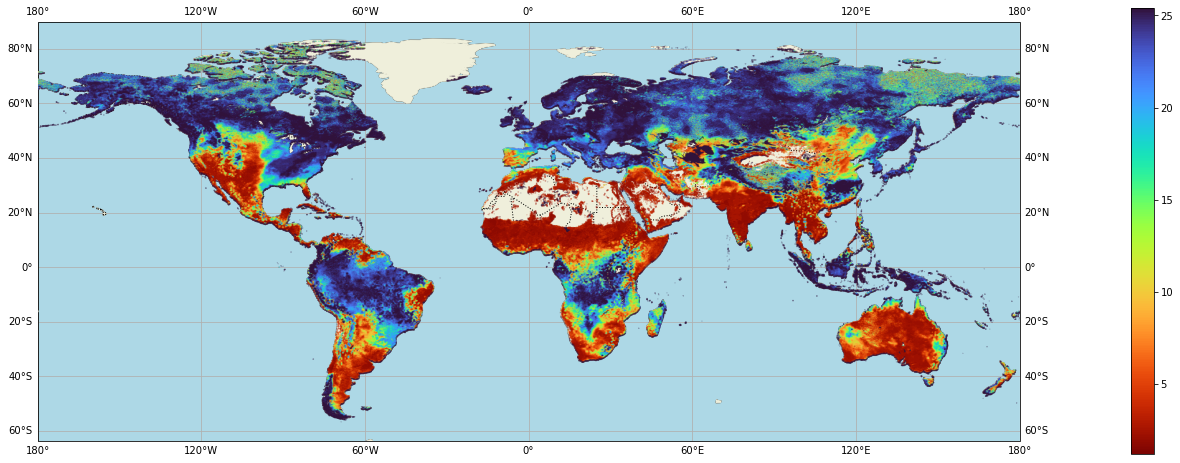

In [166]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND,zorder=7)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=1,zorder=8)
ax.add_feature(cartopy.feature.OCEAN,facecolor=('lightblue'),zorder=0)
ax.add_feature(cartopy.feature.STATES,linestyle=':', alpha=1,zorder=8)
ax.coastlines(zorder=4)
# ax.set_extent([-70, -40, 30, 55], crs=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
# ax.set_title('modis, 16 Sept 2011, 1km, quality 5',fontsize=9)
one = ax.scatter(x=ds2.lon,y=ds2.lat,c=ds2.sm,s=.01,cmap='turbo_r',zorder=10)
fig.colorbar(one,fraction=0.02, pad=0.1)

In [145]:
ds3 = ds2.where((ds2.lat<0) & (ds2.lon>110) & (ds2.sm <= 25.39),drop=True)

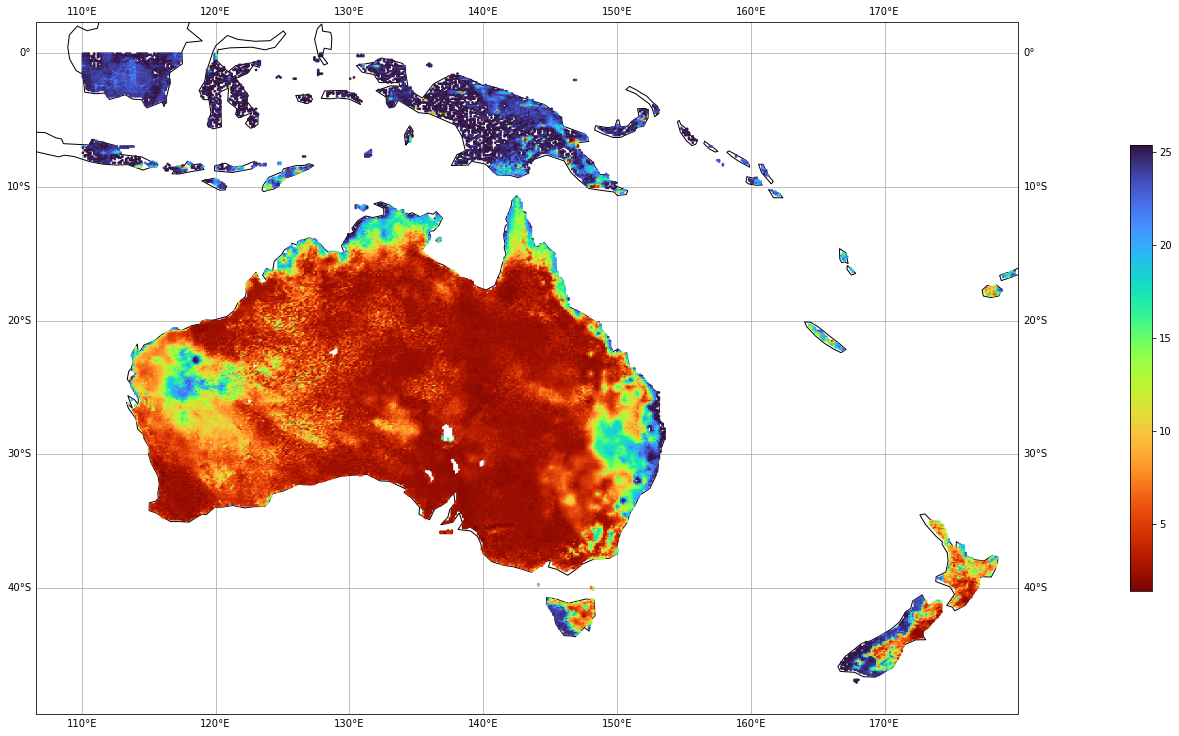

In [165]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
# ax.add_feature(cartopy.feature.LAND,zorder=7)
# ax.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=1,zorder=8)
# ax.add_feature(cartopy.feature.OCEAN,facecolor=('lightblue'),zorder=0)
# ax.add_feature(cartopy.feature.STATES,linestyle=':', alpha=1,zorder=8)
ax.coastlines(zorder=4)
# ax.set_extent([-70, -40, 30, 55], crs=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
# ax.set_title('modis, 16 Sept 2011, 1km, quality 5',fontsize=9)
one = ax.scatter(x=ds3.lon,y=ds3.lat,c=ds3.sm,s=3,cmap='turbo_r',zorder=10)
fig.colorbar(one,fraction=0.02, pad=0.1)

In [5]:
import numpy as np
links = np.load('smap_links.npy')
links.shape

(841, 2)

In [9]:
# print(links[:,1])

import urllib

In [10]:
!cd smap_ee/

In [11]:
for x in links:
    urllib.request.urlretrieve(x[1],filename="{}.zip".format(x[0]))

In [12]:
import glob

In [23]:
zips = sorted(glob.glob('smap_ee/*.zip'))
print(len(zips))

841


In [14]:
import shutil

In [24]:
zips[-1]

'smap_ee/20220224_20220226.zip'

In [22]:
links[-1]

array(['20220224_20220226',
       'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/da36e0ce35004baf93379dff51301ae1-f265e2bd3bc8c8c9c7d05f2b0c27f758:getPixels'],
      dtype='<U157')

In [25]:
for idx,x in enumerate(zips):
    shutil.unpack_archive(x,links[idx,0])

In [26]:
tifs = glob.glob('smap_ee/unzipped/*/*.tif')
print(len(tifs))

841


In [28]:
for x in tifs:
    shutil.copy2(x,'smap_ee/tifs/')

In [34]:
smap_dled = rs.open(glob.glob('smap_ee/tifs/*.tif')[0])
smap_dled_np = smap_dled.read(1)

In [35]:
smap_dled_np.shape

(1920, 2560)

In [42]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy 
import cartopy.crs as ccrs

<b> important! this turns the file into an .nc file and includes the latitude / longitude coordinates embedded in the geotiff reference system
    
    |
    |
    |
    |
    V

width: 2560
height: 1920
indexes: (1,)
coordinate system: EPSG:4326


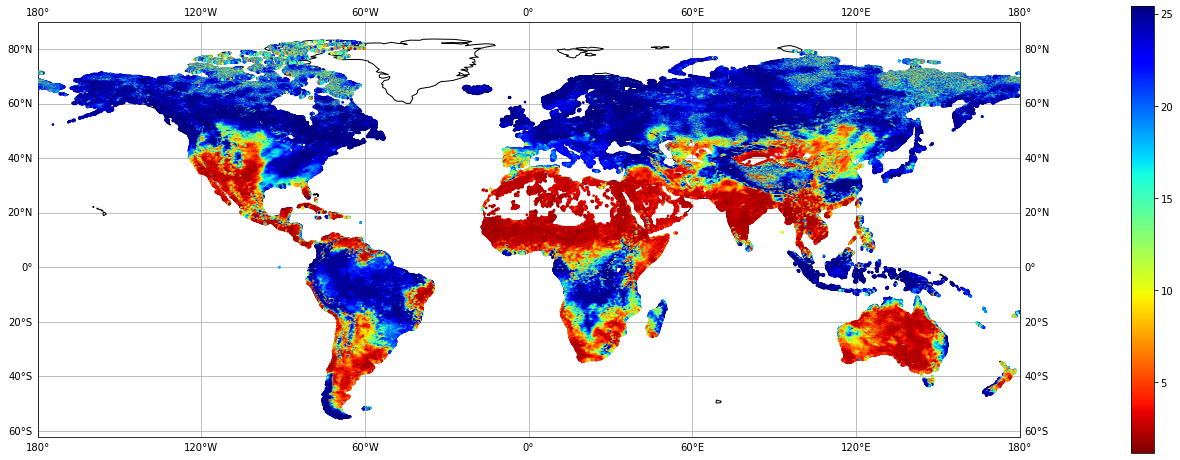

In [49]:

smap_rs = rs.open(glob.glob('smap_ee/tifs/*.tif')[0])

print('width: {}\nheight: {}\nindexes: {}\ncoordinate system: {}'.format(smap_rs.width,smap_rs.height,smap_rs.indexes,smap_rs.crs))

smap_rs = smap_rs.read(1)

smap_arr = np.asarray(smap_rs)
smap_arr = np.where(smap_arr<1,np.nan,smap_arr)
lat_vec = np.linspace(90,-90,1920)
lon_vec = np.linspace(-180,180,2560)
meshlat,meshlon = np.meshgrid(lat_vec,lon_vec,indexing='ij')

ds2 = xr.Dataset(
    data_vars=dict(

        sm=(["j", "i"], np.where(smap_arr<25.39,smap_arr,np.nan)), #25.39 is maximum value as denoted on gee website


    ),
    coords=dict(
    {
        "lat": (["j","i"], meshlat),
        "lon": (["j","i"], meshlon),
    }
))

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
# ax.add_feature(cartopy.feature.LAND,zorder=7)
# ax.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=1,zorder=8)
# ax.add_feature(cartopy.feature.OCEAN,facecolor=('lightblue'),zorder=0)
# ax.add_feature(cartopy.feature.STATES,linestyle=':', alpha=1,zorder=8)
ax.coastlines(zorder=4)
# ax.set_extent([-70, -40, 30, 55], crs=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
# ax.set_title('usda smap {} '.format(z[0]),fontsize=27)
one = ax.scatter(x=ds2.lon,y=ds2.lat,c=ds2.sm,s=3,cmap='jet_r',zorder=10)
fig.colorbar(one,fraction=0.02, pad=0.1)

In [44]:
ds2.sm.shape

(1920, 2560)

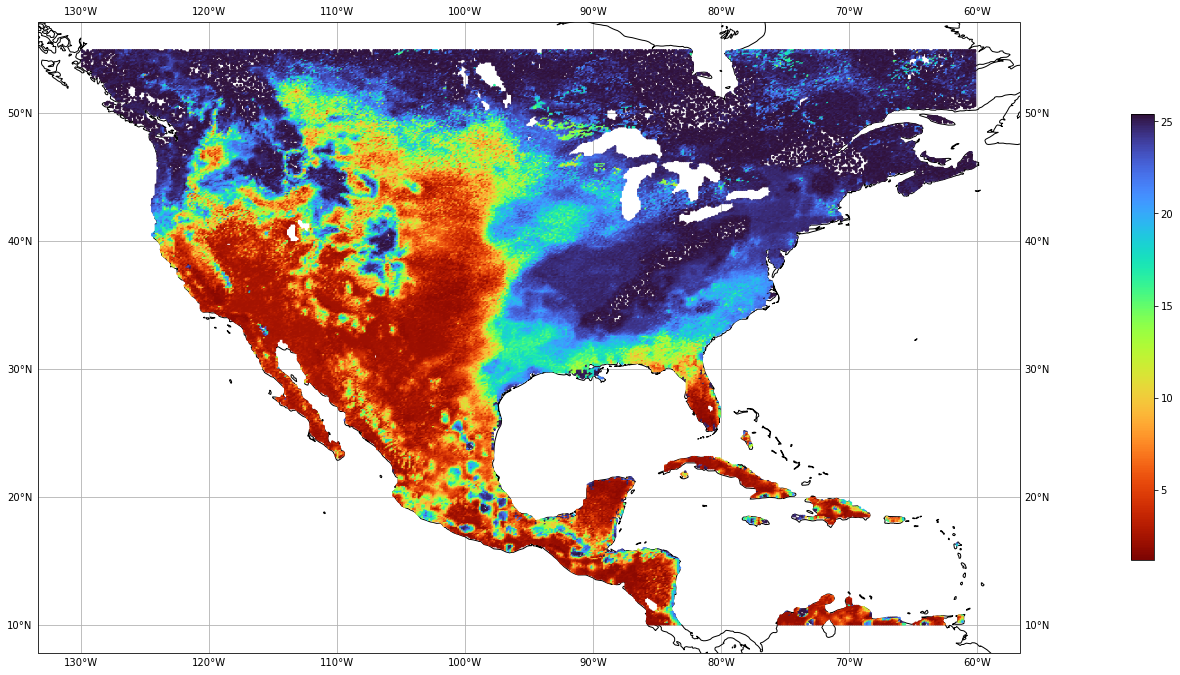

In [53]:
ds3 = ds2.where((ds2.lat>10) & (ds2.lat<55) & (ds2.lon>-130) & (ds2.lon<-60) & (ds2.sm <= 25.39),drop=True)
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
# ax.add_feature(cartopy.feature.LAND,zorder=7)
# ax.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=1,zorder=8)
# ax.add_feature(cartopy.feature.OCEAN,facecolor=('lightblue'),zorder=0)
# ax.add_feature(cartopy.feature.STATES,linestyle=':', alpha=1,zorder=8)
ax.coastlines(zorder=4)
# ax.set_extent([-70, -40, 30, 55], crs=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
# ax.set_title('modis, 16 Sept 2011, 1km, quality 5',fontsize=9)
one = ax.scatter(x=ds3.lon,y=ds3.lat,c=ds3.sm,s=3,cmap='turbo_r',zorder=10)
fig.colorbar(one,fraction=0.02, pad=0.1)

In [54]:
import geopandas

In [56]:
shutil.unpack_archive('MississippiRive.zip','mississippi')

In [57]:
basin = geopandas.read_file('mississippi/Miss_RiverBasin/Miss_RiverBasin.shp')

In [85]:
basin.crs

<Projected CRS: ESRI:102039>
Name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [86]:
basin.geometry

0    POLYGON ((-1030314.401 3039232.393, -1030299.8...
Name: geometry, dtype: geometry

<AxesSubplot:>

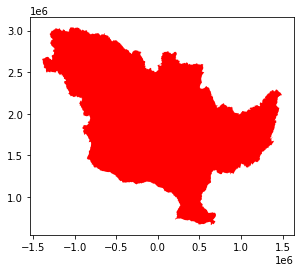

In [110]:
basin.plot(color='red')

In [109]:
import shapely
import rioxarray
from shapely.geometry import mapping

In [112]:
xds = rioxarray.open_rasterio('smap_ee/tifs/NASA_USDA_SMAP_SM20150402_20150404.ssm.tif',engine='rasterio')
xds_clip = xds.rio.clip(basin.geometry.apply(mapping),basin.crs)
xds_clip

<xarray.DataArray (band: 1, y: 222, x: 256)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * y            (y) float64 49.64 49.55 49.45 49.36 ... 29.2 29.11 29.02 28.92
  * x            (x) float64 -113.8 -113.7 -113.6 ... -78.26 -78.12 -77.98
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

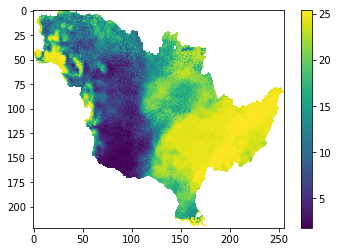

In [108]:
plt.imshow(np.where(xds_clip[0]<0,np.nan,xds_clip[0]))
plt.colorbar()

In [119]:
lat,lon = np.meshgrid(xds_clip.y,xds_clip.x,indexing='ij')
lat.shape

(222, 256)

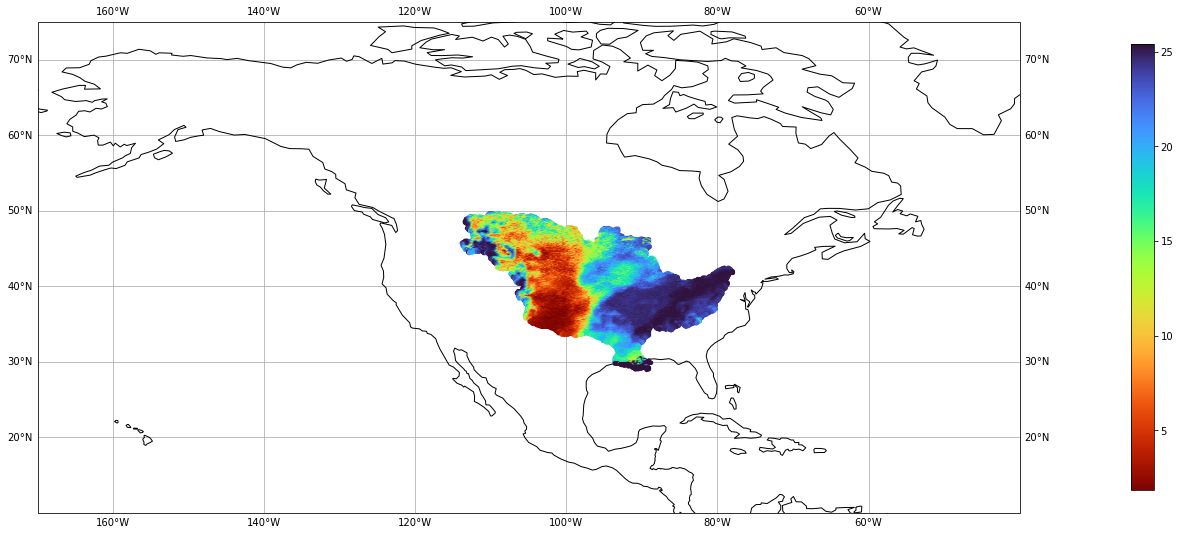

In [127]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
# ax.add_feature(cartopy.feature.LAND,zorder=7)
# ax.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=1,zorder=8)
# ax.add_feature(cartopy.feature.OCEAN,facecolor=('lightblue'),zorder=0)
# ax.add_feature(cartopy.feature.STATES,linestyle=':', alpha=1,zorder=8)
ax.coastlines(zorder=4)
ax.set_extent([-170, -40, 10, 75], crs=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
# ax.set_title('modis, 16 Sept 2011, 1km, quality 5',fontsize=9)


one = ax.scatter(x=lon,y=lat,c=np.where(xds_clip[0]<0,np.nan,xds_clip[0]),s=13,cmap='turbo_r',zorder=10)
fig.colorbar(one,fraction=0.02, pad=0.1)

In [130]:
xds.rio.crs

CRS.from_epsg(4326)

In [151]:
nldas = xr.open_dataset('/home/albertl_uri_edu/SPRING2022/2020/NLDAS_VIC0125_M.A202001.020.nc')
nldas

<xarray.Dataset>
Dimensions:          (bnds: 2, lat: 224, lon: 464, time: 1)
Coordinates:
  * lon              (lon) float32 -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * lat              (lat) float32 25.06 25.19 25.31 25.44 ... 52.69 52.81 52.94
  * time             (time) datetime64[ns] 2020-01-01
Dimensions without coordinates: bnds
Data variables: (12/44)
    time_bnds        (time, bnds) datetime64[ns] ...
    SWnet            (time, lat, lon) float32 ...
    LWnet            (time, lat, lon) float32 ...
    Qle              (time, lat, lon) float32 ...
    Qh               (time, lat, lon) float32 ...
    Qg               (time, lat, lon) float32 ...
    ...               ...
    SubSnow          (time, lat, lon) float32 ...
    ACond            (time, lat, lon) float32 ...
    LAI              (time, lat, lon) float32 ...
    SnowDepth        (time, lat, lon) float32 ...
    SnowFrac         (time, lat, lon) float32 ...
    SAlbedo_max      (time, lat, lon) float32 ...
Attributes: (12/17)
    missing_value:          -9999.0
    time_definition:        monthly
    shortname:              NLDAS_VIC0125_M_2.0
    title:                  NLDAS VIC Land Surface Model L4 Monthly 0.125 x 0...
    version:                2.0
    institution:            NASA GSFC
    ...                     ...
    websites:               https://ldas.gsfc.nasa.gov/nldas/ ; https://lis.g...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  25.0625
    SOUTH_WEST_CORNER_LON:  -124.9375
    DX:                     0.125
    DY:                     0.125

In [143]:
print(nldas.rio.crs)

None


In [152]:
# nldas = rioxarray.open_rasterio('/home/albertl_uri_edu/SPRING2022/2020/NLDAS_VIC0125_M.A202001.020.nc',engine='rasterio')
# nldas


In [148]:
import xesmf as xe

In [154]:
%%time

regrid = xe.Regridder(nldas,ds2,'bilinear')

CPU times: user 9.18 s, sys: 335 ms, total: 9.52 s
Wall time: 9.59 s


In [155]:
regrid

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_224x464_1920x2560.nc 
Reuse pre-computed weights? False 
Input grid shape:           (224, 464) 
Output grid shape:          (1920, 2560) 
Periodic in longitude?      False

In [ ]:
nldas_epsg4326 = regrid()

In [159]:
for x,y in nldas.data_vars.items():
    print(y.attrs)

{}
{'units': 'W m-2', 'standard_name': 'Surface net shortwave radiation', 'long_name': 'Net shortwave radiation flux (surface)', 'cell_methods': 'time: mean', 'valid_min': 0.4, 'valid_max': 174.3}
{'units': 'W m-2', 'standard_name': 'Surface net longwave radiation', 'long_name': 'Net longwave radiation flux (surface)', 'cell_methods': 'time: mean', 'valid_min': -121.200005, 'valid_max': 4.0}
{'units': 'W m-2', 'standard_name': 'Latent heat flux', 'long_name': 'Latent heat flux', 'cell_methods': 'time: mean', 'valid_min': -33.2, 'valid_max': 62.8}
{'units': 'W m-2', 'standard_name': 'Sensible heat flux', 'long_name': 'Sensible heat flux', 'cell_methods': 'time: mean', 'valid_min': -87.9, 'valid_max': 319.80002}
{'units': 'W m-2', 'standard_name': 'Ground heat flux', 'long_name': 'Ground heat flux', 'cell_methods': 'time: mean', 'valid_min': -20.1, 'valid_max': 6.8}
{'units': 'W m-2', 'standard_name': 'Energy of fusion', 'long_name': 'Snow phase-change heat flux', 'cell_methods': 'time: 

<b> smp is soil moisture profile in %
    
    |
    |
    |
    |
    V

In [163]:
smp_links = np.load('smap_smp_links.npy')

In [165]:
cd ~/scratch/smap_smp_ee

/scratch/albertl_uri_edu/smap_smp_ee


In [164]:
smp_links.shape

(841, 2)

In [166]:
for x in smp_links:
    urllib.request.urlretrieve(x[1],filename="{}.zip".format(x[0]))

In [175]:
zips = sorted(glob.glob('smap_smp_ee/*.zip'))
print(len(zips))

841


In [174]:
ls

MississippiRive.zip  smap_ee_links.txt  smap_smp_ee/
ee_smap.ipynb        smap_first.tif     smap_smp_links.npy
mississippi/         smap_links.npy     smap_ssm_ee/


In [182]:
# zips = sorted(glob.glob('smap_smp_ee/zips/*.zip'))
# print(len(zips))
# for x in zips:
#     shutil.copy2(x,'smap_smp_ee/zips')

# for idx,x in enumerate(zips):
#     shutil.unpack_archive(x,links[idx,0])

tifs = glob.glob('smap_smp_ee/unzipped/*/*.tif')
print(len(tifs))

for x in tifs:
    shutil.copy2(x,'smap_smp_ee/tifs/')
    
# smap_dled = rs.open(glob.glob('smap_ee/tifs/*.tif')[0])
# smap_dled_np = smap_dled.read(1)

841


841
